In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

# Unwrap MNIST data to folder

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [3]:
data = mnist_trainset.data

for i, d in enumerate(data):
    image = d.cpu().numpy()

    image_channels = np.zeros((28,28,3))
    image_channels[:, :, 0] = image
    image_channels[:, :, 1] = image
    image_channels[:, :, 2] = image

    image_channels = cv2.resize(image_channels,(64, 64))
    
    cv2.imwrite("/tf/deepLearning/diffusionmnist/data/images/" + str(i) + ".png", image_channels)
print("Saved", i, "images.")

Saved 59999 images.


# Define model

In [4]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
).cuda()

diffusion = GaussianDiffusion(
    model,
    image_size = 64,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
).cuda()

# Training and loading models

## Define trainer

In [9]:
trainer = Trainer(
    diffusion,
    '/tf/deepLearning/diffusionmnist/data/images/',
    train_batch_size = 32,
    train_lr = 2e-5,
    train_num_steps = 10000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True                        # turn on mixed precision
)

## Start training

In [ ]:
trainer.train()

# Load latest model

In [10]:
trainer.load('latest')

# Sample some images

sampling loop time step: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.72it/s]


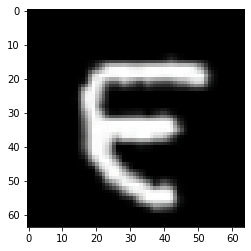

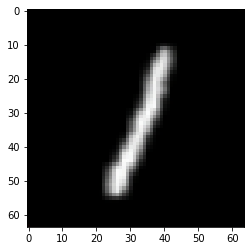

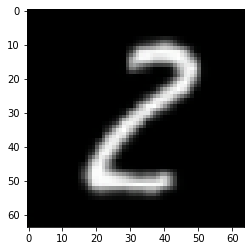

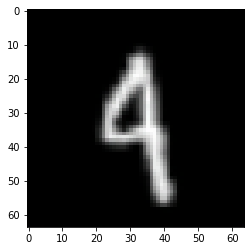

In [11]:
sampled_images = diffusion.sample(batch_size = 4)

for image in sampled_images:
    image = np.swapaxes(image.cpu().numpy(), 0,2)
    image = cv2.flip(cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE), 0)
    plt.imshow(image)
    plt.show()